# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'14aad89d2acd1b3d4bc7a9c3bccb1610'

## Generate Cities List

In [80]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:
print('Beginning Data Retrieval')
print('-----------------------------')
for i in range(1,len(b)):
    for n in range(1,len(b[i])):
        #print(b[i][n])
        params ={"q":b[i][n],
        "APPID":api_key}
        response = requests.get(text_url, params=params)
        cod = int(response.json()['cod'])
        if cod == 404:
            print('City not found. Skipping...')
        else:
            print('Processing Record %d of Set %d | %s'%(n,i,b[i][n]))
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')   

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | san pedro
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | nioro
City not found. Skipping...
Processing Record 5 of Set 1 | cap-aux-meules
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | nabire
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | alvdal
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | severnoye
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | bishop auckland
Processing Record 15 of Set 1 | piranhas
City not found. Skipping...
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | barberena
Processing Record 20 of Set 1 | aklavik
Processing Record 21 of Set 1 | roald
Processing Record 22 of Set 1 | esperance
Processing Record 23 of Set 1 | valparaiso
Processing Record 24 of Set 1 | m

Processing Record 12 of Set 5 | rundu
Processing Record 13 of Set 5 | belmonte
Processing Record 14 of Set 5 | morehead
Processing Record 15 of Set 5 | iqaluit
City not found. Skipping...
Processing Record 17 of Set 5 | sao filipe
City not found. Skipping...
Processing Record 19 of Set 5 | buchanan
Processing Record 20 of Set 5 | marsabit
Processing Record 21 of Set 5 | xuddur
Processing Record 22 of Set 5 | poddorye
Processing Record 23 of Set 5 | ribeira grande
City not found. Skipping...
Processing Record 25 of Set 5 | tecpan
Processing Record 26 of Set 5 | omboue
Processing Record 27 of Set 5 | sambava
Processing Record 28 of Set 5 | cabedelo
Processing Record 29 of Set 5 | batagay
Processing Record 30 of Set 5 | grindavik
City not found. Skipping...
Processing Record 32 of Set 5 | bloemfontein
City not found. Skipping...
Processing Record 34 of Set 5 | ust-nera
Processing Record 35 of Set 5 | katsuura
Processing Record 36 of Set 5 | papetoai
Processing Record 37 of Set 5 | grojec


Processing Record 23 of Set 9 | biltine
Processing Record 24 of Set 9 | carutapera
Processing Record 25 of Set 9 | mwinilunga
Processing Record 26 of Set 9 | altay
City not found. Skipping...
Processing Record 28 of Set 9 | durusu
Processing Record 29 of Set 9 | green river
Processing Record 30 of Set 9 | camacha
Processing Record 31 of Set 9 | tura
Processing Record 32 of Set 9 | lungi
Processing Record 33 of Set 9 | okhotsk
Processing Record 34 of Set 9 | mogadishu
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 9 | kalmunai
Processing Record 38 of Set 9 | huarmey
Processing Record 39 of Set 9 | erzin
Processing Record 40 of Set 9 | padang
Processing Record 41 of Set 9 | tianpeng
Processing Record 42 of Set 9 | kahului
Processing Record 43 of Set 9 | seoul
Processing Record 44 of Set 9 | svetlaya
Processing Record 45 of Set 9 | nome
Processing Record 46 of Set 9 | kitimat
Processing Record 47 of Set 9 | bulanash
Processing Record 48 of Set 9 | saka

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
with open(output_data_file,'w') as f:
    writer=csv.writer(f)
    writer.writerow(['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
    for element in b:
        for city in element:
            params ={"q":city,
                     "APPID":api_key}
            response = requests.get(text_url, params=params)
            text = response.json()
            cod = int(response.json()['cod'])
            if cod != 404:
                writer.writerow([text['name'], text['clouds']['all'],text['sys']['country'],text['dt'],text['main']['humidity'],text['coord']['lat'],text['coord']['lon'],text['main']['temp_max'],text['wind']['speed']])

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [94]:
df = pd.read_csv('cities.csv')
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Severo-Kurilsk,88,RU,1553421613,100,50.68,156.12,269.949,6.31
1,Rikitea,88,PF,1553421846,100,-23.12,-134.97,298.949,7.66
2,Georgetown,20,GY,1553421600,100,6.80,-58.16,294.150,2.41
3,San Francisco,20,US,1553422000,93,37.78,-122.42,282.590,3.10
4,East London,0,ZA,1553418000,48,-33.02,27.91,303.150,4.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

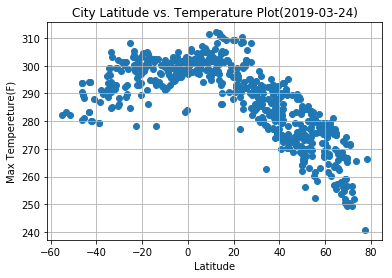

In [113]:
dt = time.strftime("%Y-%m-%d", time.localtime(df['Date'][1]))
plt.scatter(df['Lat'],df['Max Temp'])
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Tempereture(F)')
plt.title('City Latitude vs. Temperature Plot'+'('+dt+')')
plt.show()

#### Latitude vs. Humidity Plot

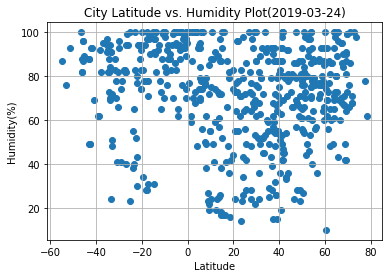

In [118]:
plt.scatter(df['Lat'],df['Humidity'])
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity Plot'+'('+dt+')')
plt.show()

#### Latitude vs. Cloudiness Plot

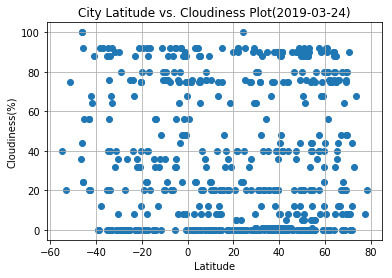

In [119]:
plt.scatter(df['Lat'],df['Cloudiness'])
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness Plot'+'('+dt+')')
plt.show()

#### Latitude vs. Wind Speed Plot

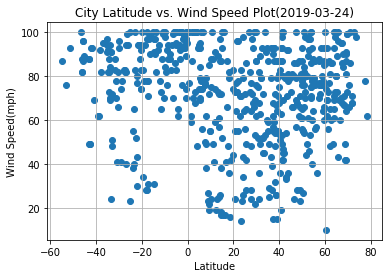

In [120]:
plt.scatter(df['Lat'],df['Humidity'])
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs. Wind Speed Plot'+'('+dt+')')
plt.show()